In [1]:
import numpy as np
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import time
import math

# 1 数据读取
 - 每秒所有采集数据放置在一行，数据间用空格分隔，不同类型数据（例如空间变位的三个方向、风速和风向）之间用逗号分隔

#### 1.1 读入数据

In [2]:
# 读取数据，返回dataframe格式
def readFile(path):
    return pd.read_csv(path)
path = r"..\数据\浦仪夹江大桥数据4.27\主跨跨中竖向位移PT-GR-05.csv"
df = readFile(path)
# del df['纵桥向风速']

In [3]:
df.head()

,测点编号,采集时间,主梁挠度
0,PT-GR-05,2021-04-27 19:00:15,-19.702380952380416 -19.702380952380416 -19.70...
1,PT-GR-05,2021-04-27 19:00:16,-4.07738095238086 -4.449404761904141 -4.449404...
2,PT-GR-05,2021-04-27 19:00:17,-8.541666666667336 -8.541666666667336 -8.54166...
3,PT-GR-05,2021-04-27 19:00:18,-2.9613095238101295 -2.9613095238101295 -2.961...
4,PT-GR-05,2021-04-27 19:00:19,-2.9613095238092413 -2.9613095238092413 -2.961...


In [4]:
df.tail()

,测点编号,采集时间,主梁挠度
172336,PT-GR-05,2021-04-29 18:59:55,1.874999999999627 1.874999999999627 1.87499999...
172337,PT-GR-05,2021-04-29 18:59:56,0.014880952381002288 0.014880952381002288 0.01...
172338,PT-GR-05,2021-04-29 18:59:57,3.7351190476186957 3.3630952380945267 3.363095...
172339,PT-GR-05,2021-04-29 18:59:58,0.7589285714284522 0.7589285714284522 0.386904...
172340,PT-GR-05,2021-04-29 18:59:59,-5.193452380952923 -5.193452380952923 -5.19345...


#### 1.2  数据校验

In [5]:
# 数据类型转换
def change_datatype(df):
    df["主梁挠度"] = df["主梁挠度"].apply(lambda x: np.array(x.split(" "), dtype = float))
    df["采集时间"] = df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
    return df
df = change_datatype(df)
df.head()

,测点编号,采集时间,主梁挠度
0,PT-GR-05,2021-04-27 19:00:15,"[-19.702380952380416, -19.702380952380416, -19..."
1,PT-GR-05,2021-04-27 19:00:16,"[-4.07738095238086, -4.449404761904141, -4.449..."
2,PT-GR-05,2021-04-27 19:00:17,"[-8.541666666667336, -8.541666666667336, -8.54..."
3,PT-GR-05,2021-04-27 19:00:18,"[-2.9613095238101295, -2.9613095238101295, -2...."
4,PT-GR-05,2021-04-27 19:00:19,"[-2.9613095238092413, -2.9613095238092413, -2...."


In [6]:
def data_verification(df):
    #统计每秒钟内的采样频率
    df["每秒采样频率"] = df["主梁挠度"].apply(lambda x: len(x))
    print(df["每秒采样频率"].describe() ,"\n")
    
    # 校验每小时漏采或多采的情况
    tmp_Series = df["采集时间"].apply(lambda x: x.strftime("%Y-%m-%d %H时")).value_counts()
    tmp_Series.index = [datetime.datetime.strptime(x[:-1],'%Y-%m-%d %H') for x in tmp_Series.index]
    tmp_Series = tmp_Series - 60*60  #（正常情况下有3600条数据）
    print(tmp_Series)
    tmp_Series = tmp_Series.sort_index()

    plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
    plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
    plt.figure (figsize= (15,4))
    plt.bar(x = tmp_Series.index[:-2], height = tmp_Series.values[:-2], width = 0.041)
    plt.xlabel("Time",fontsize='10')
    plt.ylabel("Bias",fontsize='10')
    plt.title("每小时漏采或多采的情况",fontsize='20')
    plt.plot()

count    172341.000000
mean          9.983805
std           0.558537
min           1.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          46.000000
Name: 每秒采样频率, dtype: float64 

2021-04-29 14:00:00     0
2021-04-29 08:00:00    -1
2021-04-29 17:00:00    -2
2021-04-29 12:00:00    -2
2021-04-28 18:00:00    -3
2021-04-29 01:00:00    -3
2021-04-29 09:00:00    -3
2021-04-28 15:00:00    -4
2021-04-28 22:00:00    -4
2021-04-29 15:00:00    -5
2021-04-29 00:00:00    -5
2021-04-28 17:00:00    -5
2021-04-28 01:00:00    -5
2021-04-29 07:00:00    -5
2021-04-28 13:00:00    -5
2021-04-28 02:00:00    -5
2021-04-28 05:00:00    -6
2021-04-28 10:00:00    -6
2021-04-29 06:00:00    -6
2021-04-29 13:00:00    -6
2021-04-29 11:00:00    -6
2021-04-29 18:00:00    -7
2021-04-28 00:00:00    -7
2021-04-27 20:00:00    -8
2021-04-28 08:00:00    -8
2021-04-29 05:00:00    -8
2021-04-28 03:00:00    -9
2021-04-29 03:00:00    -9
2021-04-28 04:00:00    -9
2021-04-28 16:00:00    -9
2021-

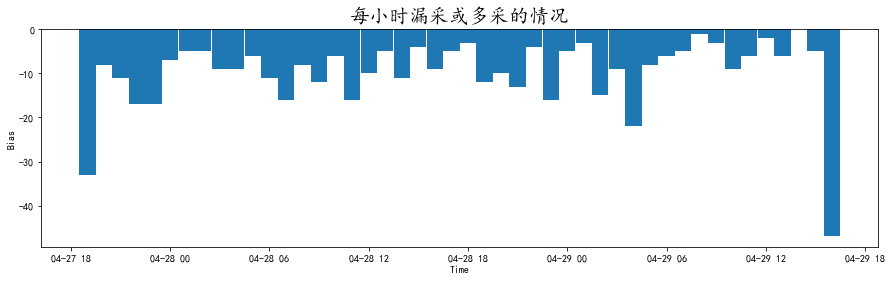

In [7]:
data_verification(df)

 - 采样频率为10,但个别秒存在多采或少采的情况
 - 每小时应该存在3600条数据，但实际上存在偏差，特别是2021-04-29 16时的数据

# 2 数据预处理
 - 针对数据校验的结果，对数据进行进一步处理

#### 2.1 数据展开

In [8]:
df.sort_values(by="采集时间",axis=0,ascending=True,inplace=True)
df.drop_duplicates(subset=['采集时间'], keep='first', inplace=True)
df.reset_index(inplace=True)
del df['index']

In [9]:
df.head()

,测点编号,采集时间,主梁挠度,每秒采样频率
0,PT-GR-05,2021-04-27 19:00:15,"[-19.702380952380416, -19.702380952380416, -19...",10
1,PT-GR-05,2021-04-27 19:00:16,"[-4.07738095238086, -4.449404761904141, -4.449...",10
2,PT-GR-05,2021-04-27 19:00:17,"[-8.541666666667336, -8.541666666667336, -8.54...",10
3,PT-GR-05,2021-04-27 19:00:18,"[-2.9613095238101295, -2.9613095238101295, -2....",10
4,PT-GR-05,2021-04-27 19:00:19,"[-2.9613095238092413, -2.9613095238092413, -2....",10


In [10]:
##############################################################
# @desc: 对数据的每一行进行处理，返回dataframe
##############################################################
def produce_unit(x):
    # 生成时间序列
    time_list = pd.date_range(start=x["采集时间"], periods=10, freq='100ms')
    # 生成加速度序列
    z = x["主梁挠度"]
    if len(z) < 10:
        nan_list = np.full(10-len(z), np.nan)
        z = np.append(z,nan_list)
    elif len(z) > 10:
        z = z[:10]
    return pd.DataFrame({'采集时间':time_list,'主梁挠度':z})
    
##############################################################
# @desc: 对数据的每一行进行处理，返回dataframe
# @dependencies: produce_unit
##############################################################
def prepossessing(df):
    intermediary = df.apply(lambda x: produce_unit(x), axis = 1, result_type = 'reduce')  # intermediary是一个Seriess，但每个数据是一个dataFrame
    result = intermediary[0]   # 初始化
    for i in range(1, len(intermediary)):
        # 判断是否不连续
        intervel = (intermediary[i]["采集时间"][0] - intermediary[i-1]["采集时间"][0]).seconds
        if (intervel > 1):
            adding = pd.DataFrame(
                {'采集时间':pd.date_range(start=intermediary[i-1]["采集时间"][0] + datetime.timedelta(minutes=1), periods=int(intervel -1)*10, freq='100ms'),
                 '主梁挠度':np.full(int(intervel-1)*10, np.nan)
                }
            ) 
            result = pd.concat([result,adding,intermediary[i]])
        else:
            result = pd.concat([result,intermediary[i]])
    result.reset_index(inplace = True)
    del result['index']
    return result

In [11]:
disposed_df = df.copy()
disposed_df = prepossessing(disposed_df)

In [12]:
disposed_df.to_csv('..\数据\浦仪夹江大桥数据4.27\disposed\跨中竖向位移.csv')

#### 2.2 归一化

In [2]:
disposed_df = pd.read_csv('..\数据\浦仪夹江大桥数据5.4\disposed\跨中竖向位移.csv',index_col=False)
del disposed_df['Unnamed: 0']
# disposed_df['采集时间'] = disposed_df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')) 

# def normalization(df,columns=[]):
#     for col in columns:
#         df[columns] = df[columns] / (df[columns].max() - df[columns].min())
#         df[columns] = df[columns] - df[columns].mean()
#     return df

# cols = ['主梁挠度']
# disposed_df = normalization(disposed_df,cols)

In [3]:
disposed_df

,采集时间,主梁挠度
0,2021-05-04 00:00:00.000,-3.705357
1,2021-05-04 00:00:00.100,-3.705357
2,2021-05-04 00:00:00.200,-3.705357
3,2021-05-04 00:00:00.300,5.595238
4,2021-05-04 00:00:00.400,5.595238
...,...,...
1727675,2021-05-05 23:59:27.500,NaN
1727676,2021-05-05 23:59:27.600,NaN
1727677,2021-05-05 23:59:27.700,NaN
1727678,2021-05-05 23:59:27.800,NaN


#### 2.3 原始数据可视化

Text(0.5, 1.0, '竖向位移')

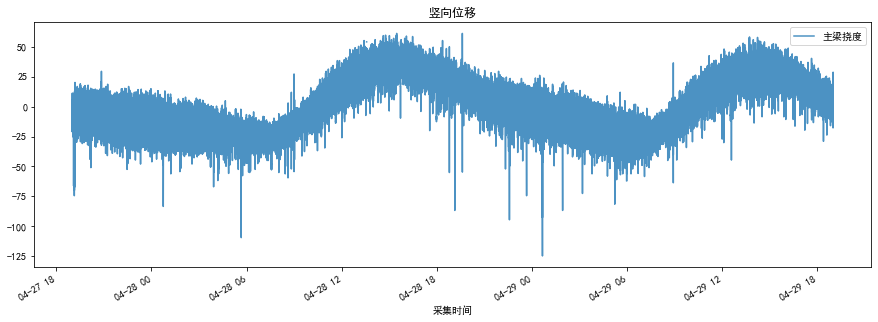

In [16]:
#disposed_df['采集时间'] = disposed_df["采集时间"].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S.%f')) 
disposed_df.index = disposed_df['采集时间']

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

disposed_df[['主梁挠度']].plot(figsize=(15,5),alpha=0.8)
plt.title('竖向位移')

# 2 数据分析

#### 2.1 以十分钟为单位划分数据集
 - 计算窗体时间内的平均Vx、Vy、Vz和平均风速的风向
 - 计算紊流度：
     - Iu = sigma_vx/sqrt(vx^2+vy^2)
     - Iv = sigma_vy/sqrt(vx^2+vy^2)
     - Iw = sigma_vz/sqrt(vx^2+vy^2)

In [4]:
def get_stats(df, interval = 60*10, freq = 10):
    df["class"] = np.array(df.index.values / (freq*interval), dtype=int)
    result = df.groupby('class').agg({'采集时间':min, '主梁挠度':[np.mean,np.std]}) 
    result.columns = ['采集时间','竖向变位平均值','竖向变位标准差']
    return result

In [5]:
stats = get_stats(disposed_df, interval = 60*10, freq = 10)

In [6]:
stats

,采集时间,竖向变位平均值,竖向变位标准差
class,,,
0,2021-05-04 00:00:00.000,0.265047,3.870752
1,2021-05-04 00:10:00.000,-0.794858,4.422763
2,2021-05-04 00:20:00.000,-1.266266,3.956104
3,2021-05-04 00:30:00.000,-3.134053,3.822152
4,2021-05-04 00:40:00.000,-4.598755,5.084820
...,...,...,...
283,2021-05-05 23:10:00.000,-4.273996,5.378839
284,2021-05-05 23:20:00.000,-5.190326,4.556694
285,2021-05-05 23:30:00.000,-5.971817,4.576352


In [7]:
stats.to_csv('..\数据\浦仪夹江大桥数据5.4\processed_data\跨中竖向位移统计值.csv')